In [1]:
from google.colab import files

# This will prompt you to select a file from your local system
uploaded = files.upload()

Saving 01_District_wise_crimes_committed_IPC_2001_2012.csv to 01_District_wise_crimes_committed_IPC_2001_2012.csv


In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd



# Step 1: Load Dataset



In [29]:
crime_data = pd.read_csv("01_District_wise_crimes_committed_IPC_2001_2012.csv")

In [30]:
crime_data

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [37]:
crime_data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [7]:
# Step 2: Filter Unique Values from State/UT Column
unique_states = crime_data['STATE/UT'].unique()  # Replace 'STATE/UT' with the actual column name if different

# Step 3: Display Unique States/UTs
print("Unique States/UTs:")
print(unique_states)

Unique States/UTs:
['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI UT' 'LAKSHADWEEP'
 'PUDUCHERRY']


In [8]:
# Step 2: Handle Missing Values
print("Missing values before cleaning:")
print(crime_data.isnull().sum())
crime_data.dropna(inplace=True)  # Drop rows with missing values
print("Missing values after cleaning:")
print(crime_data.isnull().sum())

Missing values before cleaning:
STATE/UT                                               0
DISTRICT                                               0
YEAR                                                   0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                                             0
KIDNAPPING & ABDUCTION                                 0
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS            0
KIDNAPPING AND ABDUCTION OF OTHERS                     0
DACOITY                                                0
PREPARATION AND ASSEMBLY FOR DACOITY                   0
ROBBERY                                                0
BURGLARY                                               0
THEFT                                                  0

In [9]:
# Step 3: Rename Columns for Consistency
crime_data.rename(columns={
    "STATE/UT": "State",
    "YEAR": "Year",
    "TOTAL IPC CRIMES": "Crime_Count"  # Replace with actual column name if different
}, inplace=True)

In [10]:
# Step 4: Normalize State Names
crime_data['State'] = crime_data['State'].str.strip()  # Remove leading/trailing spaces

In [11]:
# Step 5: Remove Duplicates
crime_data.drop_duplicates(inplace=True)

In [12]:
# Step 6: Filter Necessary Columns
crime_data = crime_data[['State', 'Year', 'Crime_Count']]  # Keep only relevant columns

In [18]:
crime_data

,State,Year,Crime_Count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
...,...,...,...
9012,LAKSHADWEEP,2012,60
9013,LAKSHADWEEP,2012,60
9014,PUDUCHERRY,2012,787
9015,PUDUCHERRY,2012,3494


In [20]:
crime_data.head(28)

,State,Year,Crime_Count
0,ANDHRA PRADESH,2001,4154
1,ANDHRA PRADESH,2001,4125
2,ANDHRA PRADESH,2001,5818
3,ANDHRA PRADESH,2001,3140
4,ANDHRA PRADESH,2001,6507
5,ANDHRA PRADESH,2001,287
6,ANDHRA PRADESH,2001,7848
7,ANDHRA PRADESH,2001,11831
8,ANDHRA PRADESH,2001,5811
9,ANDHRA PRADESH,2001,4582


In [21]:
state_year_crime = crime_data.groupby(['State', 'Year'])['Crime_Count'].sum().reset_index()

In [22]:
state_year_crime

,State,Year,Crime_Count
0,A & N ISLANDS,2001,1316
1,A & N ISLANDS,2002,1216
2,A & N ISLANDS,2003,1288
3,A & N ISLANDS,2004,1496
4,A & N ISLANDS,2005,1364
...,...,...,...
415,WEST BENGAL,2008,210838
416,WEST BENGAL,2009,226072
417,WEST BENGAL,2010,259232
418,WEST BENGAL,2011,286394


In [24]:
state_crime_rate = crime_data.groupby('State')['Crime_Count'].sum().reset_index()

In [25]:
state_crime_rate

,State,Crime_Count
0,A & N ISLANDS,18204
1,ANDHRA PRADESH,4037962
2,ARUNACHAL PRADESH,55304
3,ASSAM,1195528
4,BIHAR,2692586
5,CHANDIGARH,81614
6,CHHATTISGARH,1122054
7,D & N HAVELI,9302
8,DAMAN & DIU,5896
9,DELHI UT,1266348


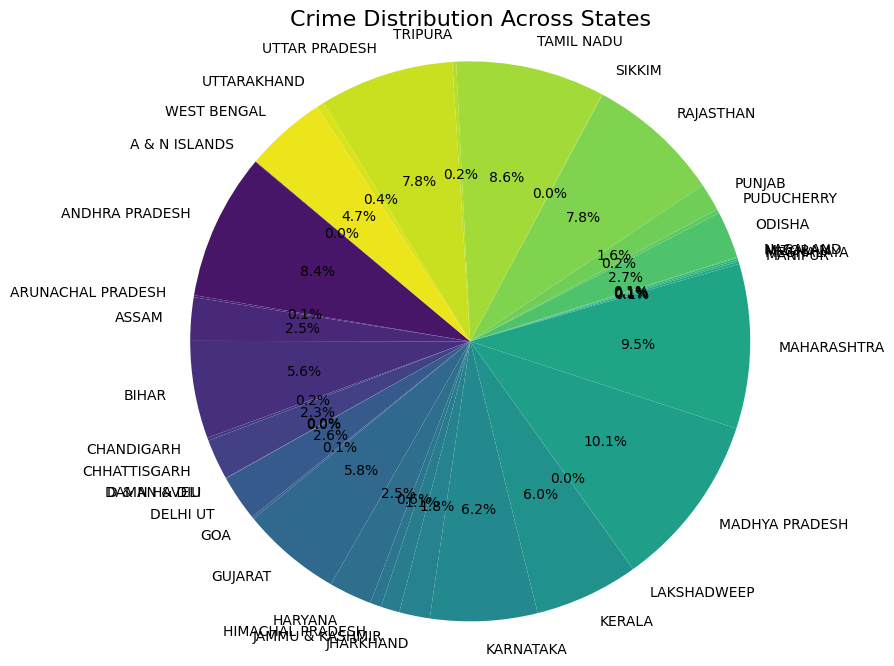

In [26]:
# Pie Chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(state_crime_rate['Crime_Count'], labels=state_crime_rate['State'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(state_crime_rate)))
plt.title('Crime Distribution Across States', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

<ipython-input-27-3c68bf0f9a16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


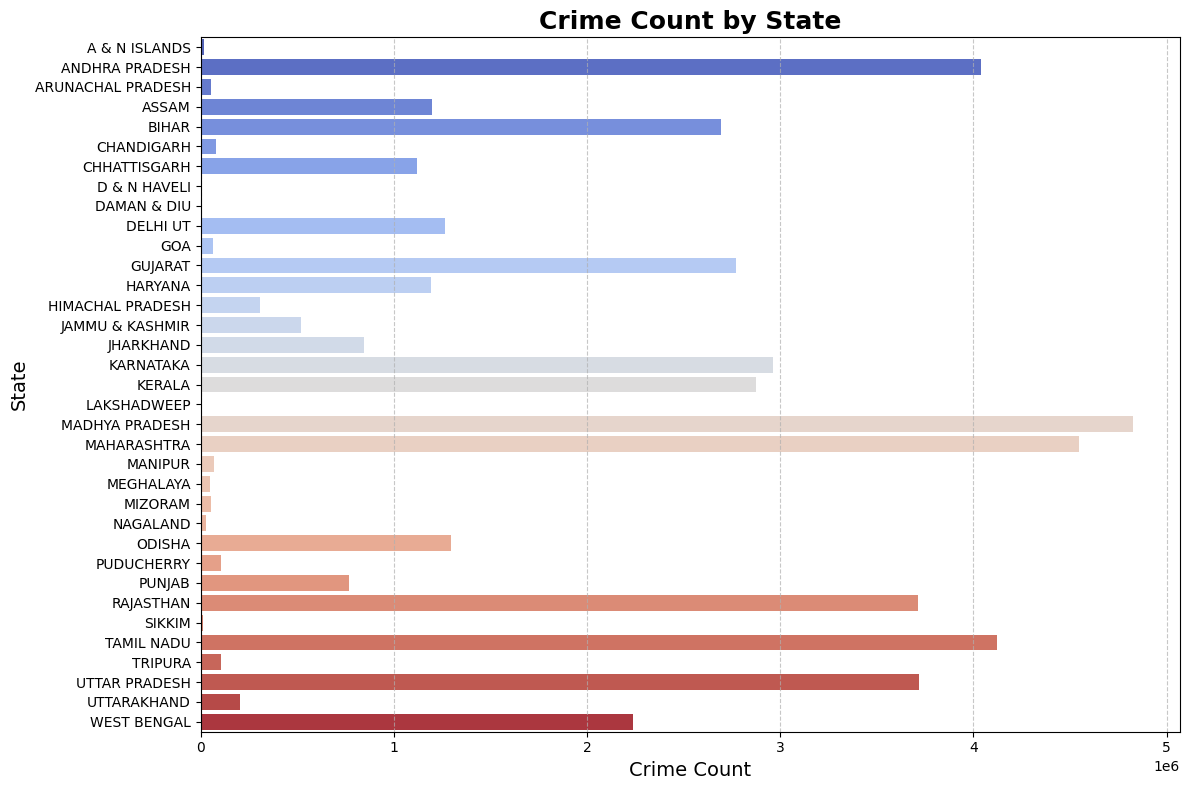

In [27]:
# Updated Bar Plot (Horizontal Bar with Gradient Colors)
plt.figure(figsize=(12, 8))
colors = sns.color_palette("coolwarm", len(state_crime_rate))
sns.barplot(
    x='Crime_Count',
    y='State',
    data=state_crime_rate,
    palette=colors
)
plt.title('Crime Count by State', fontsize=18, weight='bold')
plt.xlabel('Crime Count', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [39]:
# Encode categorical variables
crime_data= pd.get_dummies(crime_data, columns=['STATE/UT', 'DISTRICT'], drop_first=True)


In [40]:
# Step 3: Define the target variable and features
target = 'TOTAL IPC CRIMES'
features = [col for col in crime_data.columns if col != target]

X = crime_data[features]
y = crime_data[target]

In [41]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Step 5: Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

In [46]:
# Step 7: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [47]:
mae

294.20769955654106

In [48]:
mse

3297960.8649680167

In [49]:
rmse

np.float64(1816.0288722837026)

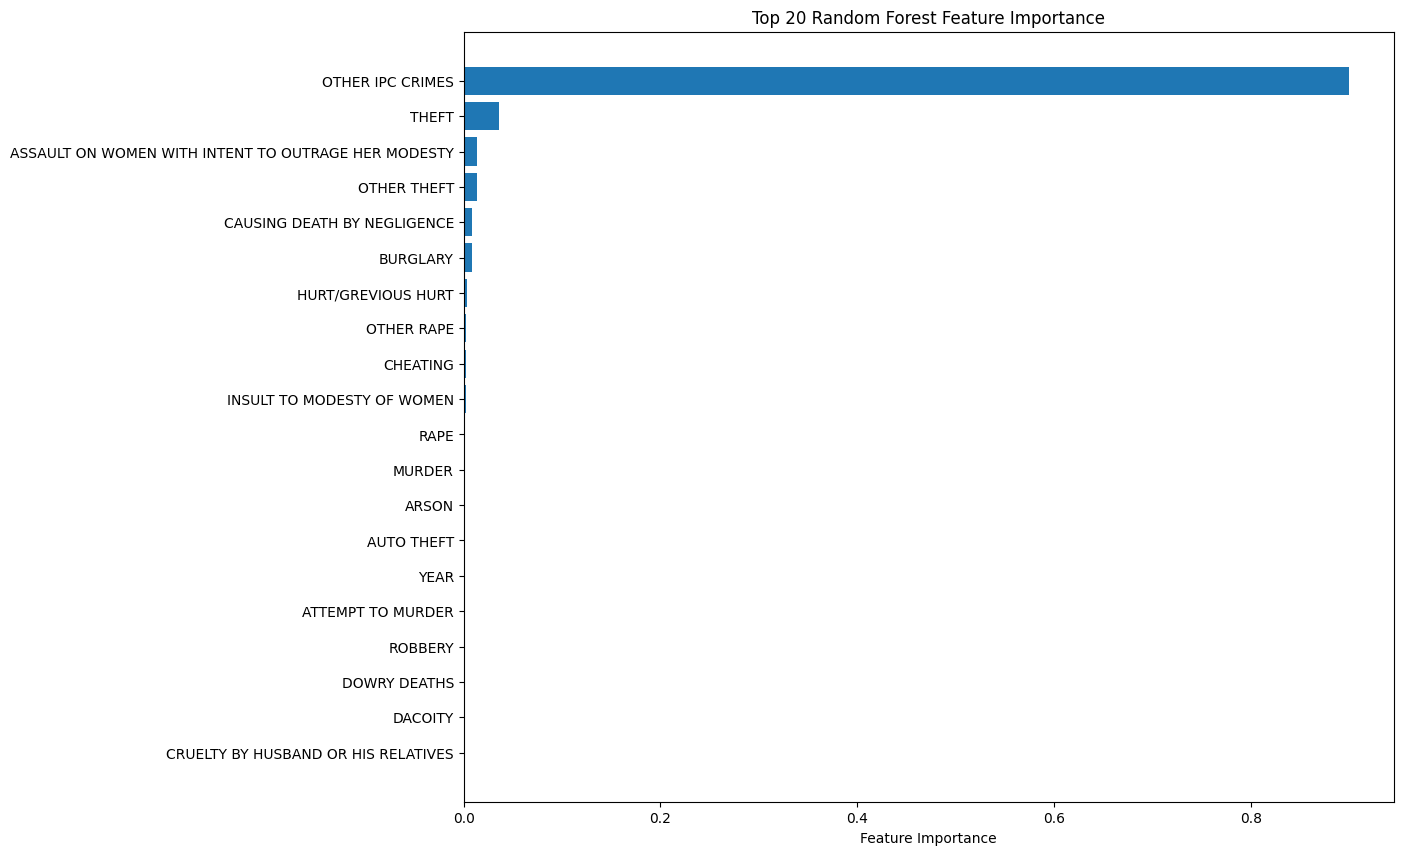

In [59]:
# Step 8: Feature Importance
feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)[-20:] # Select the indices of the top 20 features
plt.figure(figsize=(12, 10)) # Adjusted figure size for fewer features
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), np.array(features)[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 20 Random Forest Feature Importance") # Updated title
plt.show()

In [76]:
statewise_total_ipc = state_crime_rate[['State', 'Crime_Count']]

In [63]:
statewise_total_ipc

,State,Crime_Count
0,A & N ISLANDS,18204
1,ANDHRA PRADESH,4037962
2,ARUNACHAL PRADESH,55304
3,ASSAM,1195528
4,BIHAR,2692586
5,CHANDIGARH,81614
6,CHHATTISGARH,1122054
7,D & N HAVELI,9302
8,DAMAN & DIU,5896
9,DELHI UT,1266348


In [78]:
# Add the 'THEFT' column from `state_crime_rate` to `statewise_total_ipc`
statewise_total_ipc['THEFT'] = crime_data['THEFT']

In [82]:
# Add the 'THEFT' column from `state_crime_rate` to `statewise_total_ipc`
statewise_total_ipc['THER IPC CRIMES'] = crime_data['OTHER IPC CRIMES']

In [83]:
statewise_total_ipc

,State,Crime_Count,THEFT,THER IPC CRIMES
0,A & N ISLANDS,18204,1518,1518
1,ANDHRA PRADESH,4037962,754,754
2,ARUNACHAL PRADESH,55304,1262,1262
3,ASSAM,1195528,1181,1181
4,BIHAR,2692586,2313,2313
5,CHANDIGARH,81614,104,104
6,CHHATTISGARH,1122054,2426,2426
7,D & N HAVELI,9302,1512,1512
8,DAMAN & DIU,5896,1726,1726
9,DELHI UT,1266348,1450,1450


In [84]:
statewise_total_ipc['YEAR'] = crime_data['YEAR']

In [85]:
statewise_total_ipc

,State,Crime_Count,THEFT,THER IPC CRIMES,YEAR
0,A & N ISLANDS,18204,1518,1518,2001
1,ANDHRA PRADESH,4037962,754,754,2001
2,ARUNACHAL PRADESH,55304,1262,1262,2001
3,ASSAM,1195528,1181,1181,2001
4,BIHAR,2692586,2313,2313,2001
5,CHANDIGARH,81614,104,104,2001
6,CHHATTISGARH,1122054,2426,2426,2001
7,D & N HAVELI,9302,1512,1512,2001
8,DAMAN & DIU,5896,1726,1726,2001
9,DELHI UT,1266348,1450,1450,2001


In [68]:
crime_data.columns

Index(['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS',
       ...
       'DISTRICT_WARDHA', 'DISTRICT_WASHIM', 'DISTRICT_WAYANADU',
       'DISTRICT_WEST', 'DISTRICT_WEST GODAVARI', 'DISTRICT_WOKHA',
       'DISTRICT_YADGIRI', 'DISTRICT_YAMUNANAGAR', 'DISTRICT_YAVATMAL',
       'DISTRICT_ZUNHEBOTO'],
      dtype='object', length=872)

In [100]:
# Prepare data for modeling
# Sum all crimes into a single column for analysis
crime_columns = [
    'MURDER', 'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE',
    'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
    'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS', 'KIDNAPPING AND ABDUCTION OF OTHERS',
    'DACOITY', 'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY',
    'THEFT', 'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
    'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT', 'DOWRY DEATHS',
    'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY', 'INSULT TO MODESTY OF WOMEN',
    'CRUELTY BY HUSBAND OR HIS RELATIVES', 'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
    'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'
]

In [110]:
crime_data['TOTAL_CRIMES'] = crime_data[crime_columns].sum(axis=1)

In [102]:
crime_data

,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,...,DISTRICT_WASHIM,DISTRICT_WAYANADU,DISTRICT_WEST,DISTRICT_WEST GODAVARI,DISTRICT_WOKHA,DISTRICT_YADGIRI,DISTRICT_YAMUNANAGAR,DISTRICT_YAVATMAL,DISTRICT_ZUNHEBOTO,TOTAL_CRIMES
0,2001,101,60,17,50,0,50,46,30,16,...,False,False,False,False,False,False,False,False,False,8603
1,2001,151,125,1,23,0,23,53,30,23,...,False,False,False,False,False,False,False,False,False,8692
2,2001,101,57,2,27,0,27,59,34,25,...,False,False,False,False,False,False,False,False,False,12445
3,2001,80,53,1,20,0,20,25,20,5,...,False,False,False,False,False,False,False,False,False,6498
4,2001,82,67,1,23,0,23,49,26,23,...,False,False,False,False,False,False,False,False,False,14107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,2012,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,127
9013,2012,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,127
9014,2012,5,6,2,6,0,6,2,2,0,...,False,False,False,False,False,False,False,False,False,1663
9015,2012,24,21,10,7,0,7,17,14,3,...,False,False,False,False,False,False,False,False,False,7589


In [111]:
crime_data.columns

Index(['YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS',
       ...
       'DISTRICT_WASHIM', 'DISTRICT_WAYANADU', 'DISTRICT_WEST',
       'DISTRICT_WEST GODAVARI', 'DISTRICT_WOKHA', 'DISTRICT_YADGIRI',
       'DISTRICT_YAMUNANAGAR', 'DISTRICT_YAVATMAL', 'DISTRICT_ZUNHEBOTO',
       'TOTAL_CRIMES'],
      dtype='object', length=873)

In [112]:
# Encode 'STATE/UT' as numeric
label_encoder = LabelEncoder()
crime_data['YEAR_CODE'] = label_encoder.fit_transform(crime_data['YEAR'])